# Basic classification of mnist data with neu_net

I was inspired by the following tutorial to write this notebook: https://www.tensorflow.org/tutorials/keras/classification

In [8]:
from neu_net import *
import matplotlib.pyplot as plt

 ## Download data
 I wanted to use this dataset because it is very simple and I thought it would be a good start
 

In [9]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
x_train, x_test = x_train/250.0-0.5, x_test/255.0-0.5

## Explore the data. What kind of data and labels do we have?

This plots a set of images of the dataset so we can know what kind of data it is

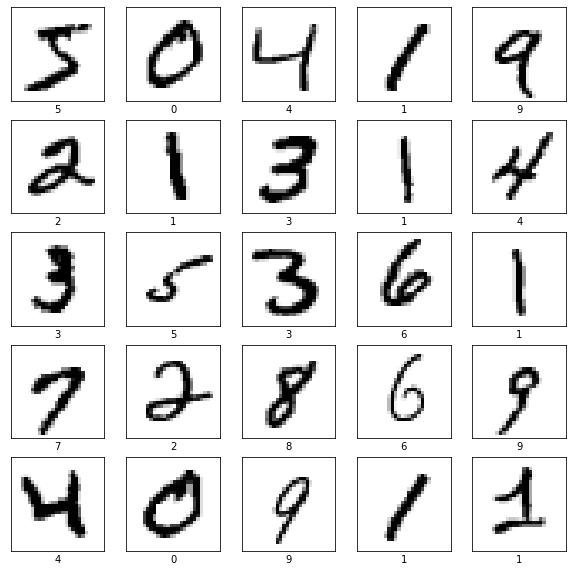

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
plt.show()

## Define model and train it

This architecture is usual

In [11]:
fl = Flatten()
d1 = Dense(input_dim = 28*28, output_dim = 128, activador = 'relu')
dr = Dropout(percent = 0.2, output_dim = 128)
d2 = Dense(input_dim = 128, output_dim = 10, activador='softmax')

opt = Adam(0.005)
model = Model([fl, d1, dr, d2], optimizer=opt)

In [12]:
model.train(x_train, y_train, epochs=60, batch_size=100)

Epoch 1     | Error 13.08874225616455    | Accuracy 0.08  
Epoch 2     | Error 9.065146446228027    | Accuracy 0.13  
Epoch 3     | Error 7.872150897979736    | Accuracy 0.16  
Epoch 4     | Error 8.010485649108887    | Accuracy 0.26  
Epoch 5     | Error 5.458072662353516    | Accuracy 0.4   
Epoch 6     | Error 5.175419807434082    | Accuracy 0.31  
Epoch 7     | Error 5.628839492797852    | Accuracy 0.26  
Epoch 8     | Error 3.518338680267334    | Accuracy 0.37  
Epoch 9     | Error 2.2545571327209473   | Accuracy 0.44  
Epoch 10    | Error 1.7194511890411377   | Accuracy 0.5   
Epoch 11    | Error 2.947641611099243    | Accuracy 0.44  
Epoch 12    | Error 3.0441858768463135   | Accuracy 0.46  
Epoch 13    | Error 2.744194269180298    | Accuracy 0.48  
Epoch 14    | Error 1.716822862625122    | Accuracy 0.64  
Epoch 15    | Error 1.2282607555389404   | Accuracy 0.64  
Epoch 16    | Error 1.7415130138397217   | Accuracy 0.57  
Epoch 17    | Error 1.2896157503128052   | Accuracy 0.65

## Let's make some predictions

This is where we test the performance of the neural network we trained

In [13]:
predictions = model(x_test)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                str(true_label)),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

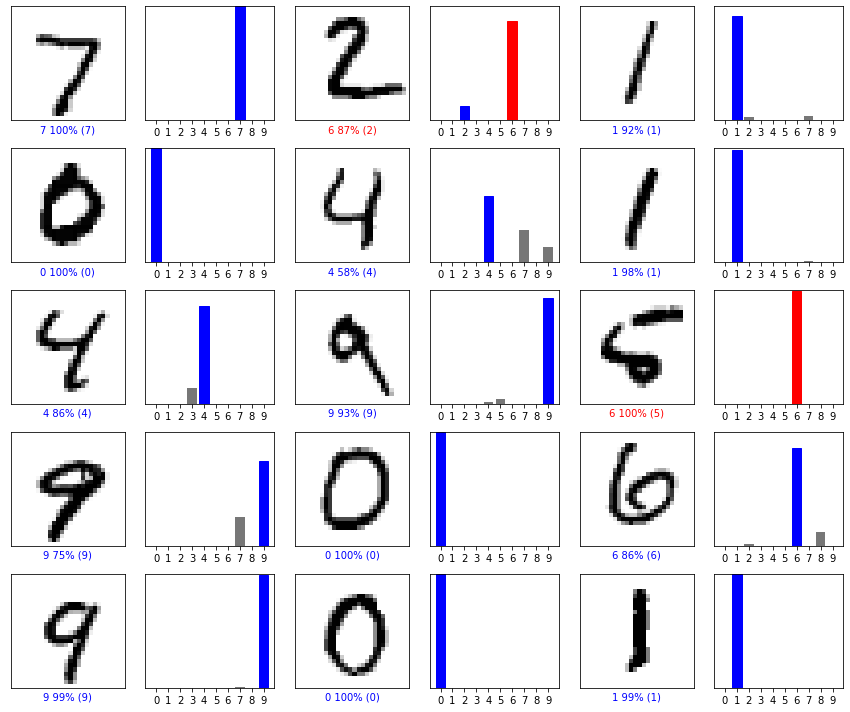

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

So as we can see, the neural network performed well on the test data set.

neu net is a very simple package in which I am working to practice what I have learned in the following course: https://www.coursera.org/learn/intro-to-deep-learning. It allows you to create and train any neural network that results from joining the following layers: dense, flatten, convolutional, dropout; with relu, sigmoid and tanh activation and softmax for classification. It allows you to create and train any neural network that results from joining the following layers: dense, flatten, convolutional, dropout